In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import pandas as pd

plt.style.use(hep.style.ROOT)

### User Defined

In [2]:
ptrigDF = pd.read_pickle(r'./PTRIG_LG50_HG63_8k_R37.pkl')
df = pd.read_pickle(r'./BEAM_LG50_HG63_8k_R36.pkl')
ADCmult = 2

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


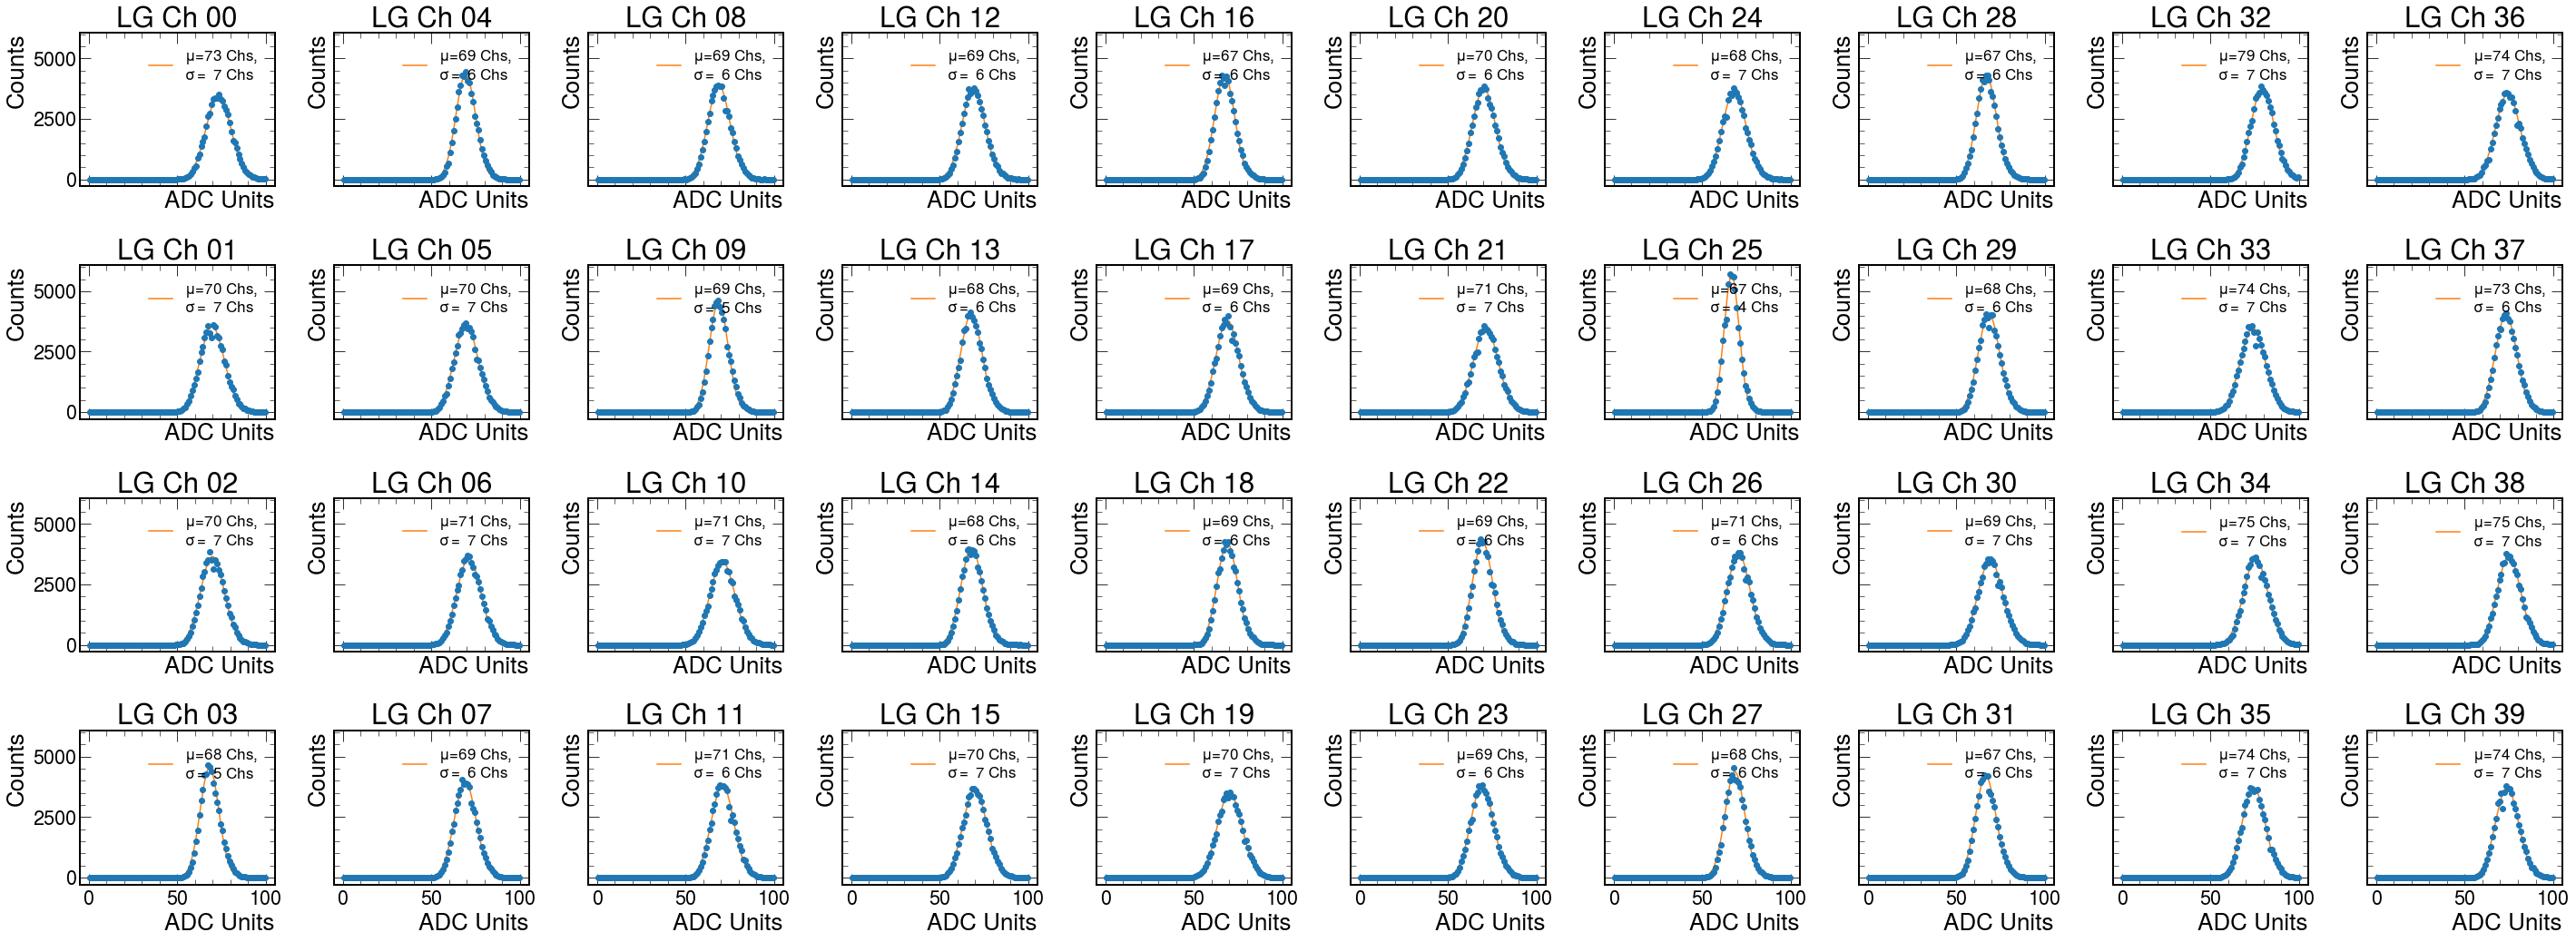

In [3]:
fig, axs=plt.subplots(4, 10, figsize=(0.5*len(ptrigDF.columns),15),sharey=True,sharex=True)
i=0
pedMeans = []
pedStds = []

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


for i in range(round(len(ptrigDF.columns)/2)):
    if i%4 == 0: 
        print(i/4)
    plt.sca(axs[i%4][i//4])
    
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    hist, bin_edges = np.histogram(np.array(getattr(ptrigDF,"Ch_{}_LG".format("{:02d}".format(i)))),range=(0,100),bins=100)
   
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    
    p0 = [max(hist), sum(getattr(ptrigDF,"Ch_{}_LG".format("{:02d}".format(i))))/len(getattr(ptrigDF,"Ch_{}_LG".format("{:02d}".format(i)))), 3.]
    coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
    hist_fit = gauss(np.linspace(0,100,5000), *coeff)
    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    plt.plot(np.linspace(0,100,5000), hist_fit, label='$\mu$=%2.0f Chs, \n$\sigma=$%2.0f Chs'%(coeff[1],abs(coeff[2])))
 
    pedMeans.append(coeff[1])

    pedStds.append(abs(coeff[2]))
    #print('Resolution = %2.1f '%(100*coeff[2]/coeff[1]))

    plt.xlabel("ADC Units")
    plt.ylabel("Counts")
  
    plt.title("LG Ch {}".format("{:02d}".format(i)))
    plt.tight_layout()
    plt.legend(fontsize=17,loc='upper right')

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


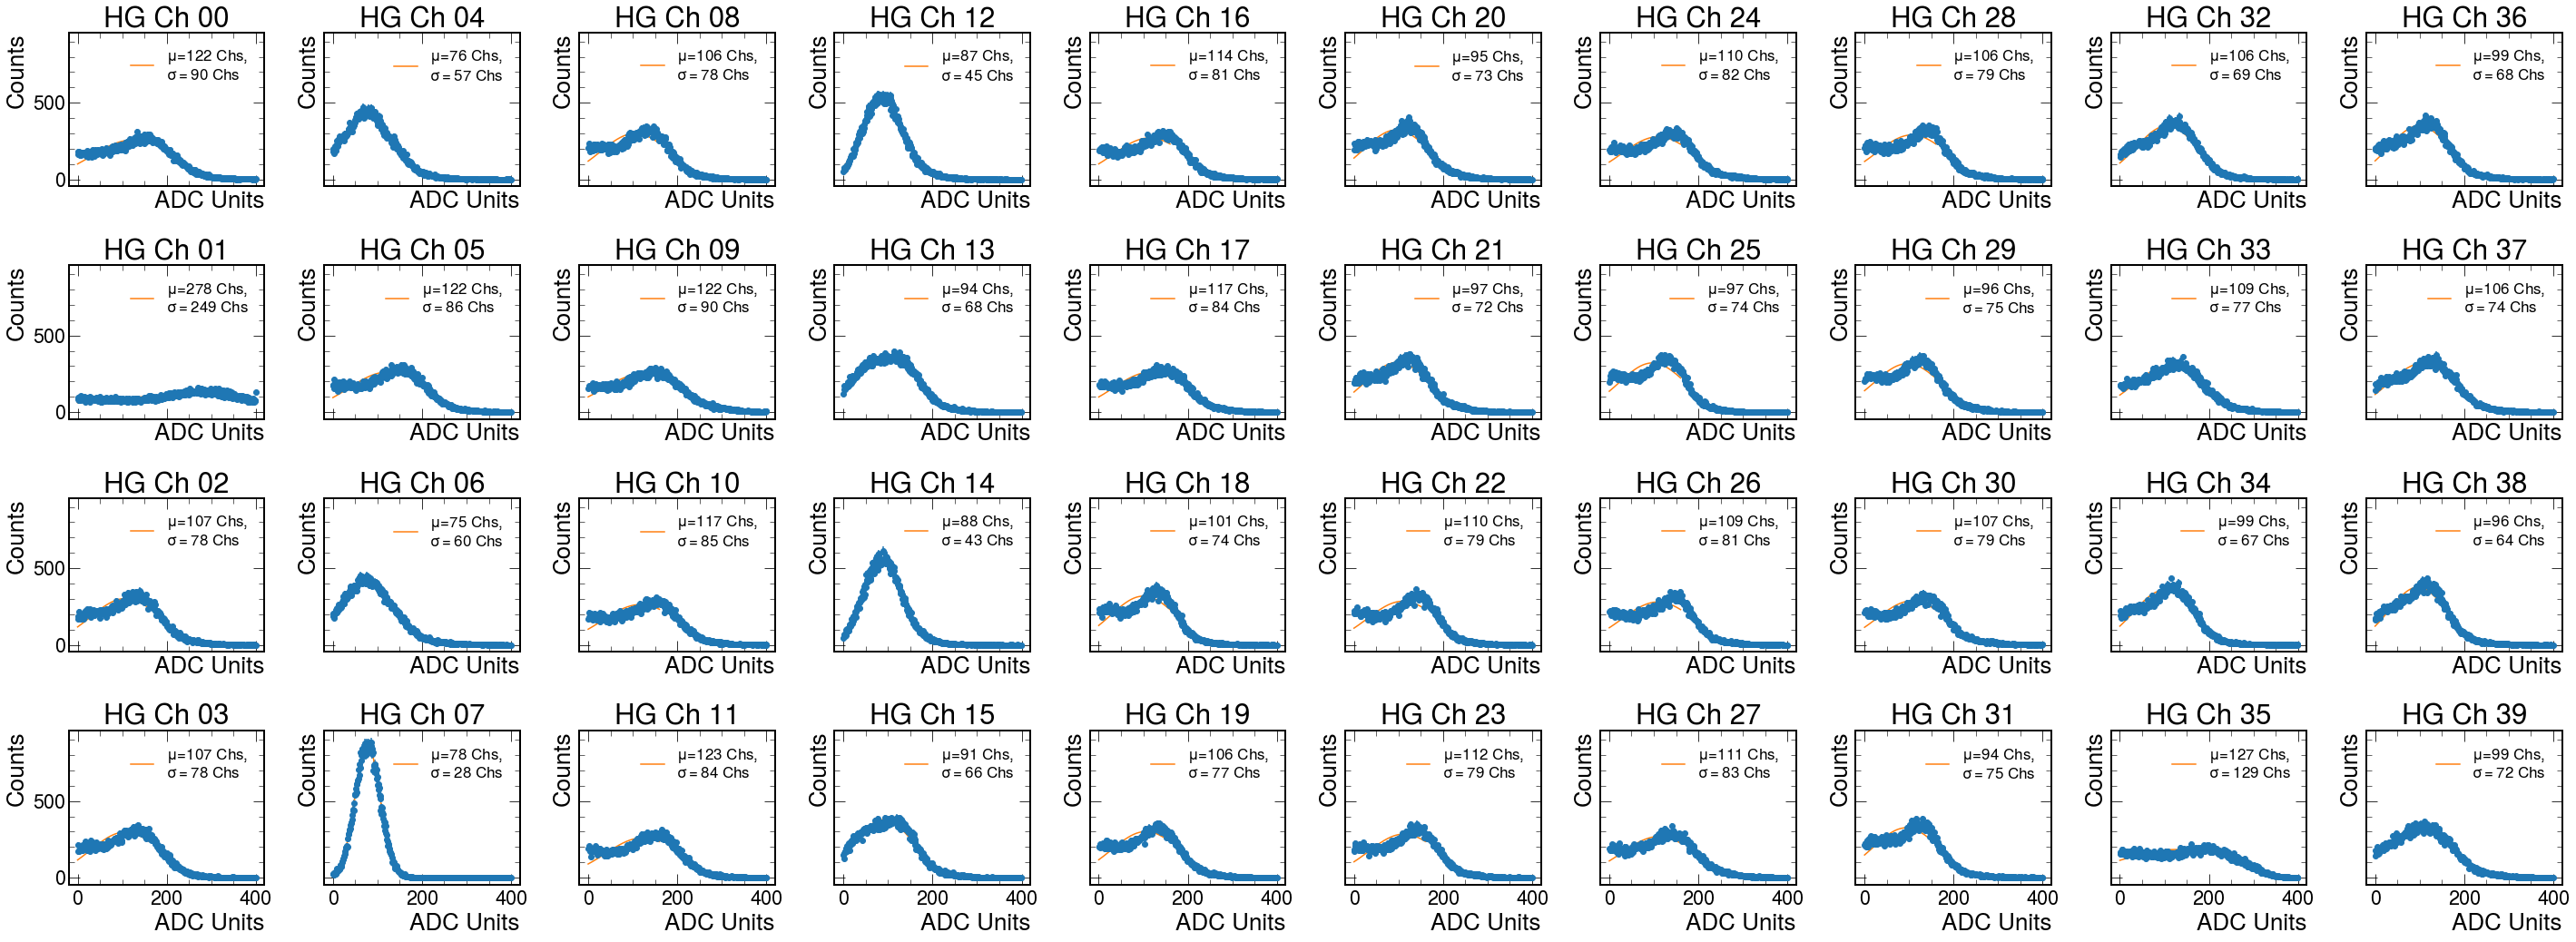

In [4]:
fig, axs=plt.subplots(4, 10, figsize=(0.5*len(ptrigDF.columns),15),sharey=True,sharex=True)
i=0
HGpedMeans = []
HGpedStds = []


for i in range(round(len(ptrigDF.columns)/2)):
    plt.sca(axs[i%4][i//4])
    if i%4 == 0: 
        print(i/4)
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    hist, bin_edges = np.histogram(np.array(getattr(ptrigDF,"Ch_{}_HG".format("{:02d}".format(i)))),range=(0,400),bins=400)
   
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    
    p0 = [max(hist),100., 50.]
    coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
    hist_fit = gauss(np.linspace(0,160,5000), *coeff)
    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    plt.plot(np.linspace(0,160,5000), hist_fit, label='$\mu$=%2.0f Chs, \n$\sigma=$%2.0f Chs'%(coeff[1],abs(coeff[2])))
    #plt.scatter(bin_centres,hist)
    HGpedMeans.append(coeff[1])
    HGpedStds.append(abs(coeff[2]))
    #print('Resolution = %2.1f '%(100*coeff[2]/coeff[1]))

    plt.xlabel("ADC Units")
    plt.ylabel("Counts")

    plt.title("HG Ch {}".format("{:02d}".format(i)))
    plt.tight_layout()
    plt.legend(fontsize=17,loc='upper right')

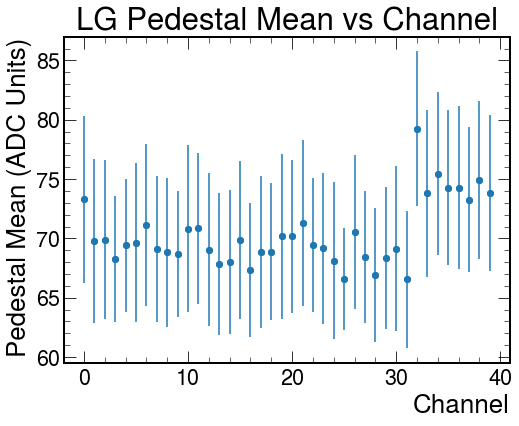

In [5]:
fig = plt.figure( figsize=(8, 6))
plt.scatter(range(0,40),pedMeans)
plt.xlabel('Channel')
plt.ylabel('Pedestal Mean (ADC Units)')
plt.title("LG Pedestal Mean vs Channel")
plt.errorbar(range(0,40), pedMeans, yerr=pedStds, fmt="o")


#plt.ylim(0,6)
plt.show()

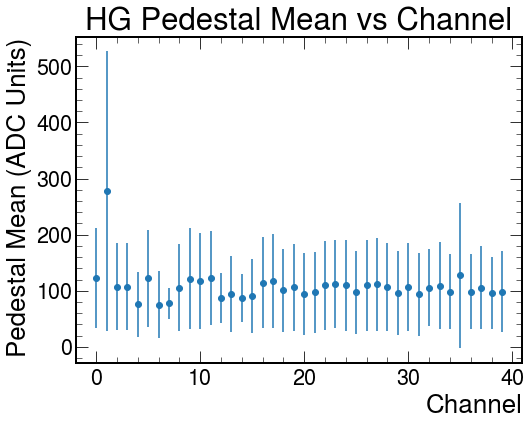

In [6]:
fig = plt.figure( figsize=(8, 6))

plt.xlabel('Channel')
plt.ylabel('Pedestal Mean (ADC Units)')
plt.title("HG Pedestal Mean vs Channel")
plt.errorbar(range(0,40), HGpedMeans, yerr=HGpedStds, fmt="o")


#plt.ylim(0,6)
plt.show()

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


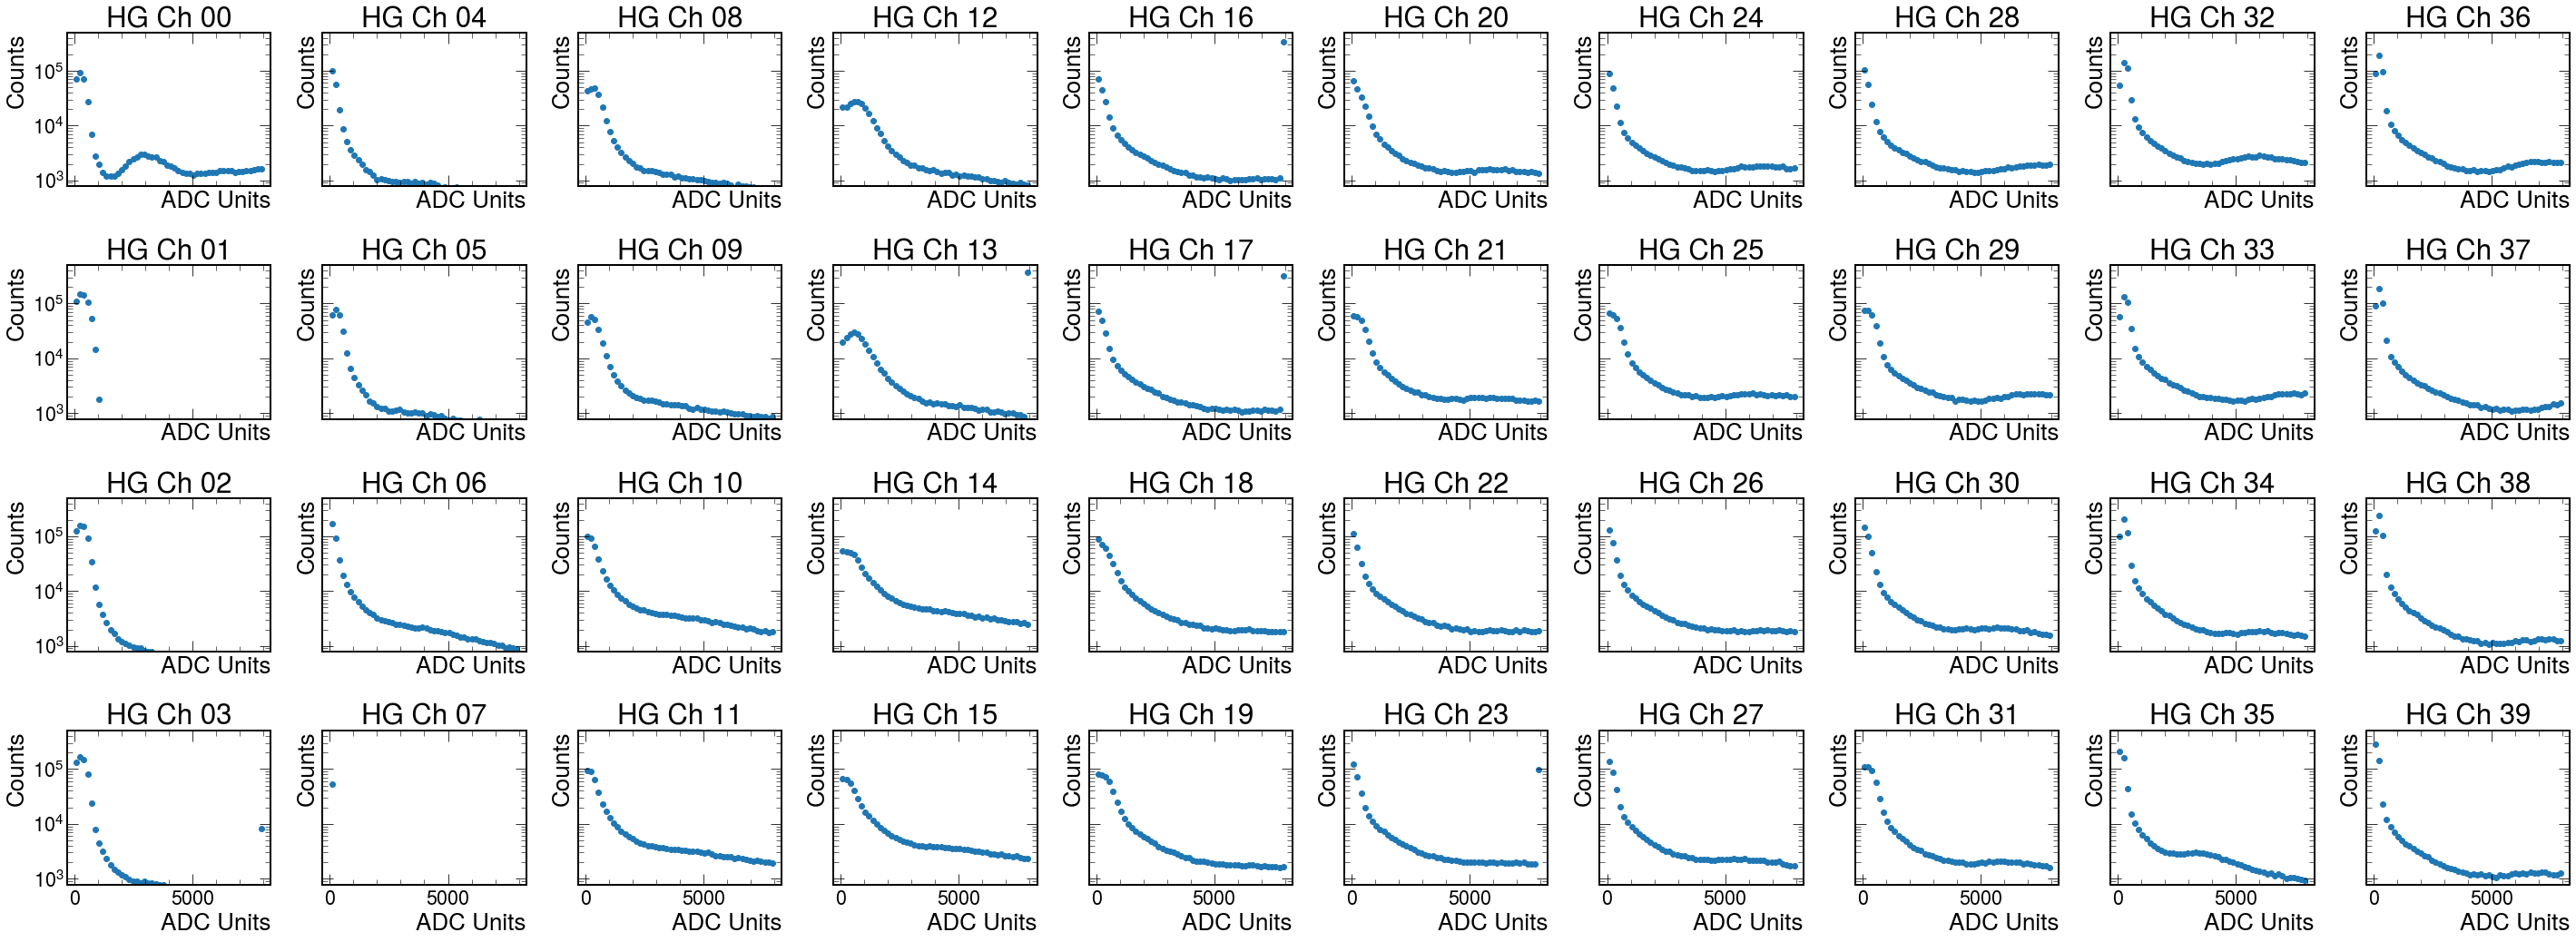

In [7]:
fig, axs=plt.subplots(4, 10, figsize=(0.5*len(ptrigDF.columns),15),sharey=True,sharex=True)
i=0
HGpedMeans = []
HGpedStds = []


for i in range(round(len(df.columns)/2)):
    plt.sca(axs[i%4][i//4])
    if i%4 == 0: 
        print(i/4)
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    hist, bin_edges = np.histogram(np.array(getattr(df,"Ch_{}_HG".format("{:02d}".format(i)))),range=(0,4000*ADCmult),bins=50)
   
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    plt.scatter(bin_centres,hist)
   

    plt.xlabel("ADC Units")
    plt.ylabel("Counts")
    plt.yscale("log")
    plt.title("HG Ch {}".format("{:02d}".format(i)))
    plt.tight_layout()
    #plt.legend(fontsize=17,loc='upper right')

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


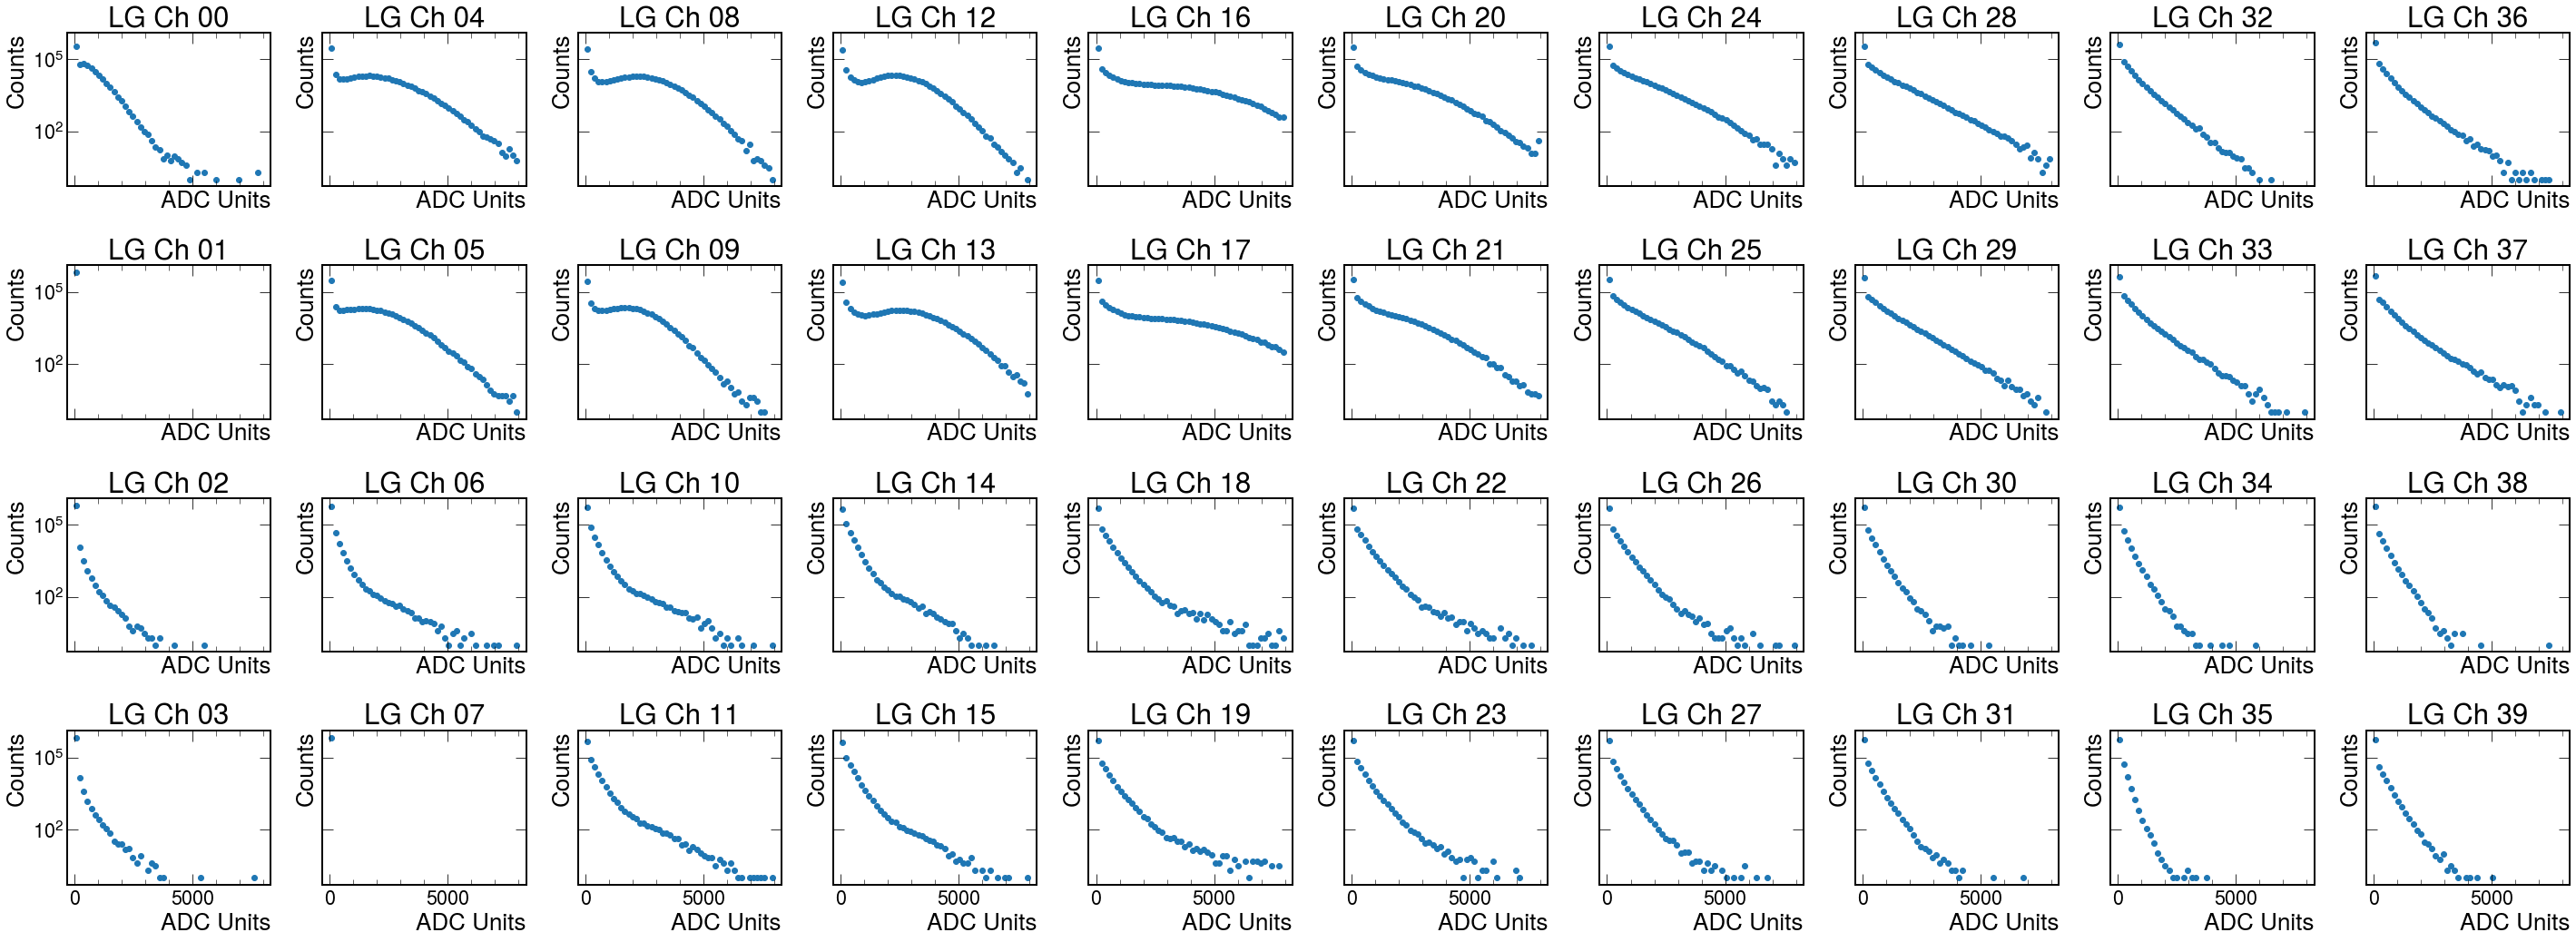

In [8]:
fig, axs=plt.subplots(4, 10, figsize=(0.5*len(ptrigDF.columns),15),sharey=True,sharex=True)
i=0
HGpedMeans = []
HGpedStds = []


for i in range(round(len(df.columns)/2)):
    plt.sca(axs[i%4][i//4])
    if i%4 == 0: 
        print(i/4)
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    hist, bin_edges = np.histogram(np.array(getattr(df,"Ch_{}_LG".format("{:02d}".format(i)))),range=(0,4000*ADCmult),bins=50)
   
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    plt.scatter(bin_centres,hist)
   

    plt.xlabel("ADC Units")
    plt.ylabel("Counts")
    plt.yscale("log")
    plt.title("LG Ch {}".format("{:02d}".format(i)))
    plt.tight_layout()
    #plt.legend(fontsize=17,loc='upper right')

Text(0.5, 1.0, 'Event Times')

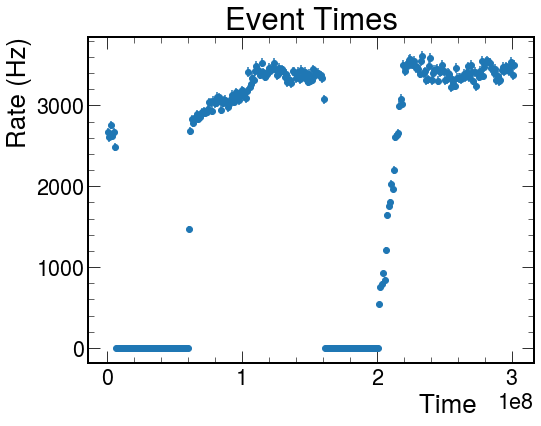

In [9]:
fig = plt.figure( figsize=(8, 6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
#plt.rcParams['savefig.bbox']='tight'
minTime = min(getattr(df,"TimeStamps"))
maxTime = max(getattr(df,"TimeStamps"))
hist, bin_edges = np.histogram(   np.array(getattr(df,"TimeStamps")), range=(minTime,maxTime), bins = round((maxTime-minTime)/1000000))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')

#plt.plot(np.linspace(0,1000,1000), label="Ch 4")
#plt.ylim(0,25)
plt.xlabel('Time        ')
plt.ylabel('Rate (Hz)')
plt.title("Event Times")


In [10]:
fig = plt.figure( figsize=(8, 6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import numpy as np

totElayer = [[],[],[],[],[],[],[],[],[],[]]
ADCtotElayer = [[],[],[],[],[],[],[],[],[],[]]
mips = [52.74750277855359, 48.30860848773839, 53.943404039851835, 44.92190677955567, 61.26714324627709, 65.86727404494636,
50.49966238440961, 55.02522837553596, 46.61446015527332, 60.39973772203866, 55.30173491280392, 62.707398178412745,
50.482420120919734, 62.40987646935536, 59.02966599638661, 55.30173491280392, 123.13587491197416, 118.85827154485337,
93.36027551977364, 104.55347745998186, 88.72268957494947, 87.9317698337502, 99.4048611423608, 109.98290193288523,
102.39942115610283, 82.29288341793296, 93.36027551977364, 93.1310966604848, 120.5428145522235, 96.02936108638767,
107.29564320373284, 93.36027551977364, 78.16073077714876, 62.53205599751284, 90.81216227164441, 90.71800272849238,
109.00527397085415, 109.68782873235487, 85.36866495961932, 93.52544458950403]
mips = [i * ADCmult for i in mips]
totAllChs = []
ADCtotAllChs = []
selectChs = []
multiplier = 1
#1.7
print(len(df))
#100000
for evtn in range(100000): 
    if evtn%20000 == 0:
        print(evtn/100000)
    if(1 > 0):
        layers = [0,0,0,0,0,0,0,0,0,0]
        ADClayers = [0,0,0,0,0,0,0,0,0,0]
        totEn = 0
        ADCtotEn = 0
             
        for lay in range(0,10):
            chsum = 0
            for ch in range(lay*4,(lay*4)+4):
                energy = getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch]
                if energy >= (pedMeans[ch] + 3*pedStds[ch]):
                    ADClayers[lay] += energy
                    ADCtotEn += energy
                    
                    if energy/mips[ch] > 0.3:
                        layers[lay] += energy/mips[ch]
                        totEn += energy/mips[ch]
                
                
            totElayer[lay].append(layers[lay])
            ADCtotElayer[lay].append(ADClayers[lay])
    
        totAllChs.append(totEn)
        ADCtotAllChs.append(ADCtotEn)
    


656713
0.0
0.2
0.4
0.6
0.8


<Figure size 576x432 with 0 Axes>

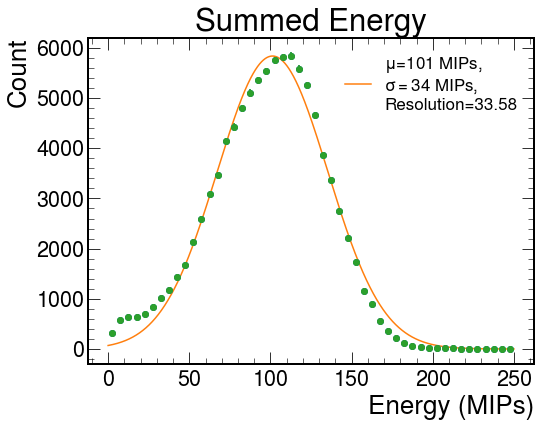

In [11]:
fig = plt.figure( figsize=(8, 6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
#print(totAllChs)
maxE = 125*ADCmult
hist, bin_edges = np.histogram(np.array(totAllChs),bins=50, range=(0,maxE))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

p0 = [6000., 80., 50.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(0,maxE,5000), *coeff)
plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
res = 100*abs(coeff[2])/coeff[1]
plt.plot(np.linspace(0,maxE,5000), hist_fit, label='$\mu$=%2.0f MIPs, \n$\sigma=$%2.0f MIPs, \nResolution=%2.2f'%(coeff[1],abs(coeff[2]),res))
plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
#plt.scatter(bin_centres,hist)
plt.xlabel('Energy (MIPs)')
plt.ylabel('Count')
#plt.ylim(0,9000)
plt.title("Summed Energy")
plt.legend(fontsize=17,loc='upper right')

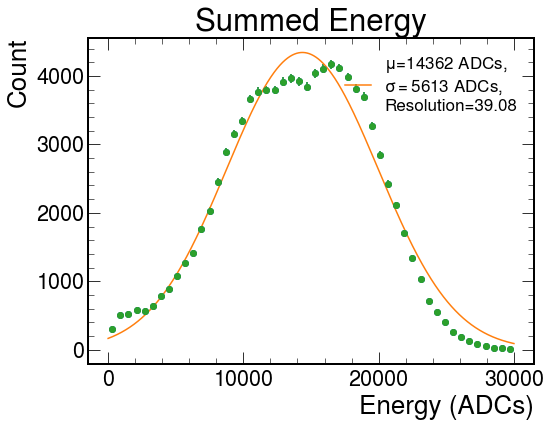

In [12]:
fig = plt.figure( figsize=(8, 6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
#print(totAllChs)
maxE = 15000*ADCmult
hist, bin_edges = np.histogram(np.array(ADCtotAllChs),bins=50, range=(0,maxE))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

p0 = [20000., 5000., 2000.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(0,maxE,5000), *coeff)
plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
res = 100*abs(coeff[2])/coeff[1]
plt.plot(np.linspace(0,maxE,5000), hist_fit, label='$\mu$=%2.0f ADCs, \n$\sigma=$%2.0f ADCs, \nResolution=%2.2f'%(coeff[1],abs(coeff[2]),res))
plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
#plt.scatter(bin_centres,hist)
plt.xlabel('Energy (ADCs)')
plt.ylabel('Count')
plt.title("Summed Energy")
#plt.ylim(0,6000)
plt.legend(fontsize=17,loc='upper right')

0
1
2
3
4
5
6
7
8
9


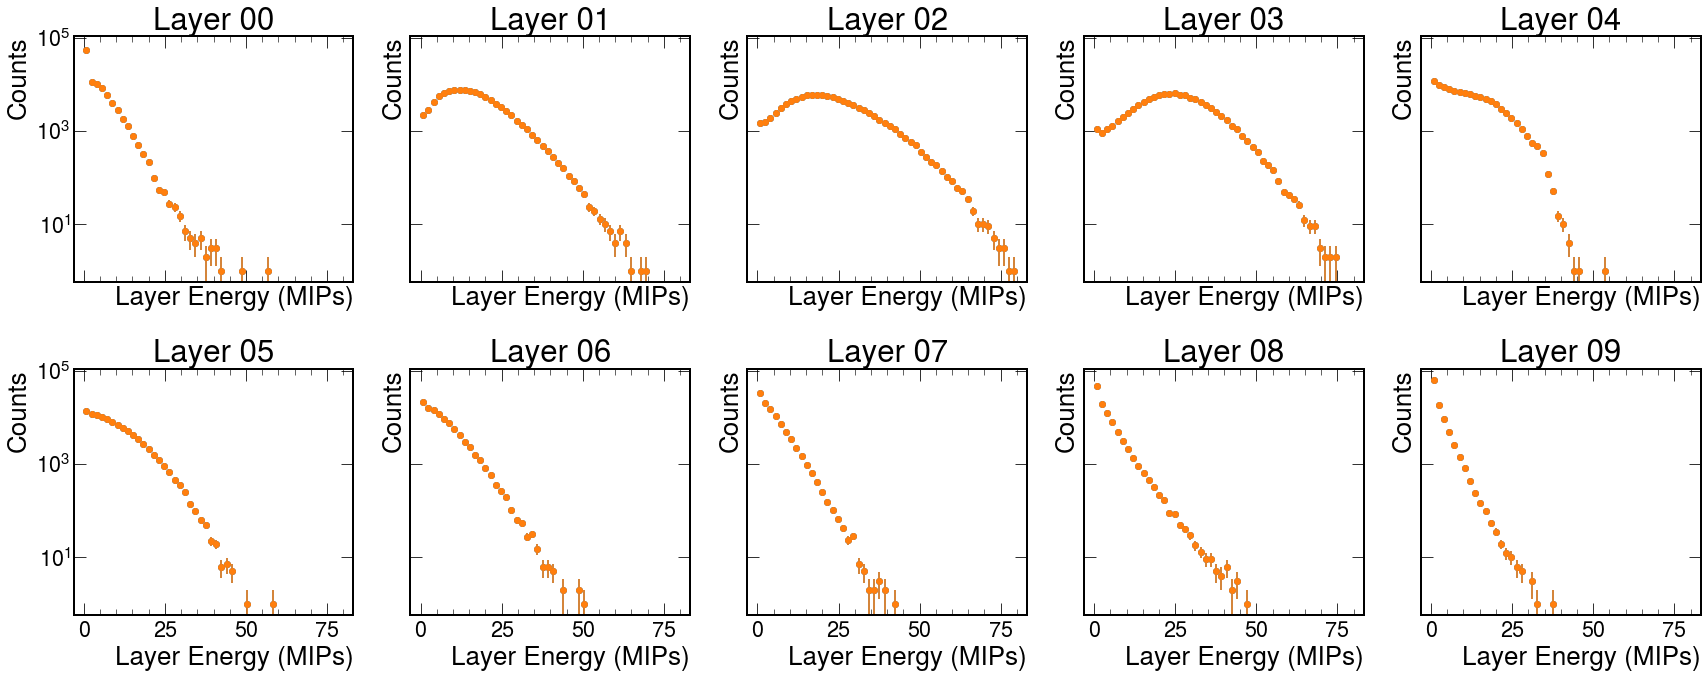

In [13]:
import statistics
fig, axs=plt.subplots(2, 5, figsize=(0.3*len(df.columns),10),sharey=True,sharex=True)

layerMed = []
layerErr = []
for i in range(10):
    print(i)
    if i <= 4:
        plt.sca(axs[0][i])
    else:
        plt.sca(axs[1][i-5])
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    
    
    
    hist, bin_edges = np.histogram(np.array(totElayer[i]),range=(0,80),bins=50)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    
    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    
    layerMed.append(statistics.median(totElayer[i]))
    layerErr.append(statistics.pstdev(totElayer[i]))
    

    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    plt.xlabel("Layer Energy (MIPs)")
    plt.ylabel("Counts")
    plt.yscale("log") 
    plt.title("Layer {}".format("{:02d}".format(i)))

    plt.tight_layout()    

0
1
2
3
4
5
6
7
8
9


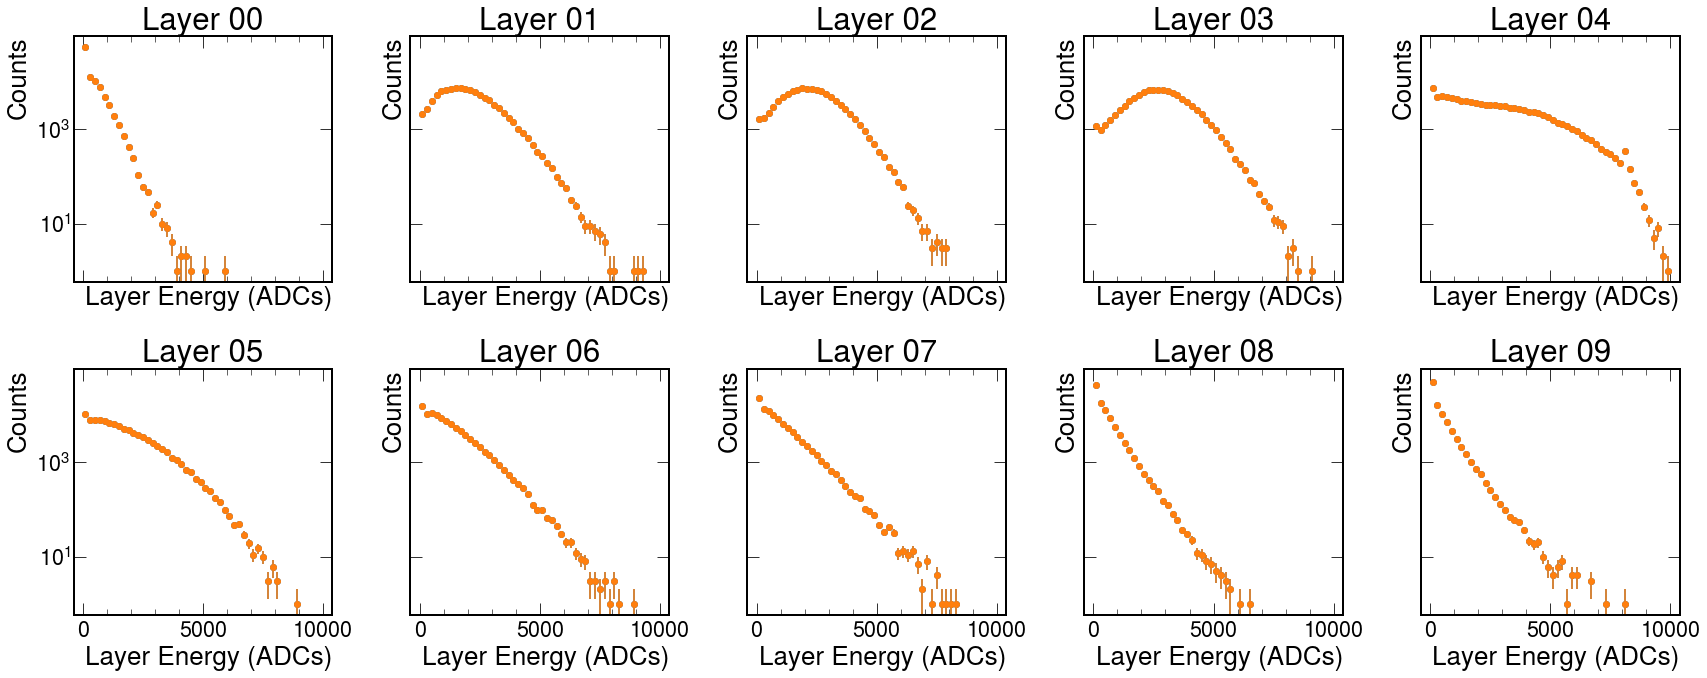

In [14]:
import statistics
fig, axs=plt.subplots(2, 5, figsize=(0.3*len(df.columns),10),sharey=True,sharex=True)

ADClayerMed = []
ADClayerErr = []
for i in range(10):
    print(i)
    if i <= 4:
        plt.sca(axs[0][i])
    else:
        plt.sca(axs[1][i-5])
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    
    
    
    hist, bin_edges = np.histogram(np.array(ADCtotElayer[i]),range=(0,5000*ADCmult),bins=50)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    
    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    
    ADClayerMed.append(statistics.median(ADCtotElayer[i]))
    ADClayerErr.append(statistics.pstdev(ADCtotElayer[i]))
    

    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    plt.xlabel("Layer Energy (ADCs)")
    plt.ylabel("Counts")
    plt.yscale("log") 
    plt.title("Layer {}".format("{:02d}".format(i)))

    plt.tight_layout()    

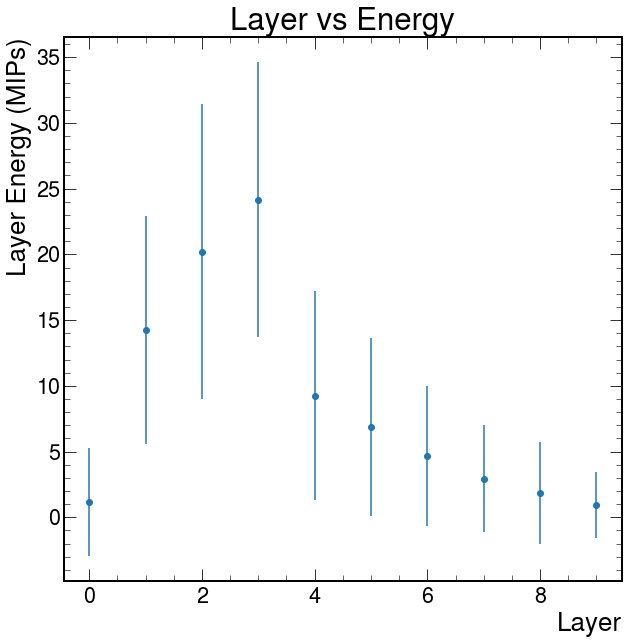

In [15]:
plt.errorbar(range(0,10), layerMed, yerr=layerErr, fmt="o")

plt.xlabel('Layer')
plt.ylabel('Layer Energy (MIPs)')
plt.title("Layer vs Energy")

plt.show()

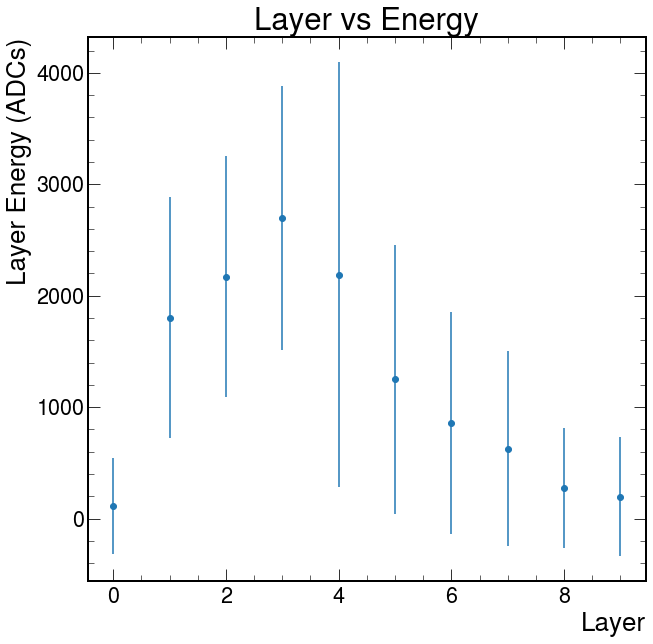

In [16]:
plt.errorbar(range(0,10), ADClayerMed, yerr=ADClayerErr, fmt="o")

plt.xlabel('Layer')
plt.ylabel('Layer Energy (ADCs)')
plt.title("Layer vs Energy")

plt.show()